In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/HP/Downloads/Social_Network_Ads - Social_Network_Ads.csv")

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
numerical_feat = [feat for feat in df.columns if df[feat].dtype != 'O' and feat not in ['User ID']]
numerical_feat

['Age', 'EstimatedSalary', 'Purchased']

In [5]:
df[numerical_feat].isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

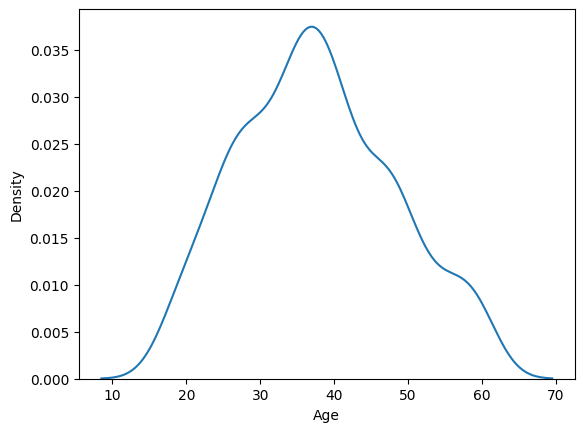

In [6]:
sns.kdeplot(data=df , x = 'Age')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

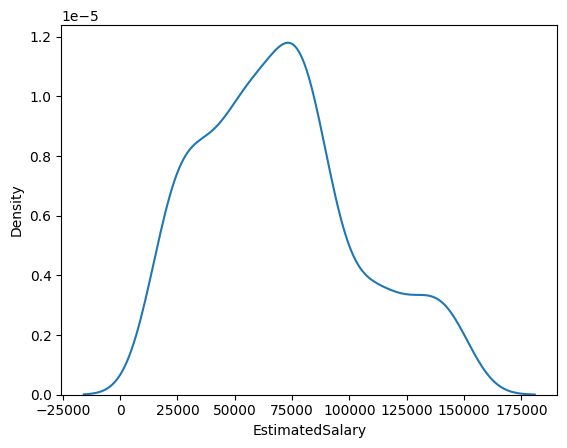

In [7]:
sns.kdeplot(data=df , x = 'EstimatedSalary')

<Axes: xlabel='Age'>

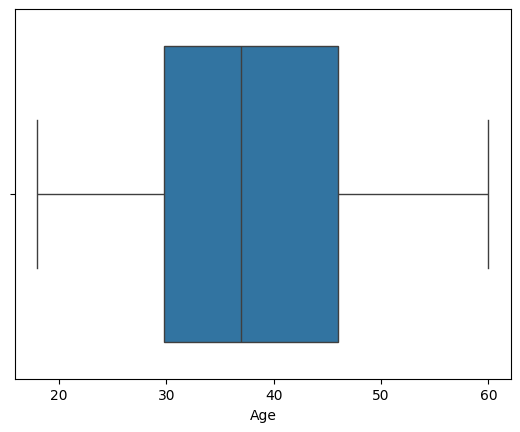

In [8]:
sns.boxplot(data=df,x='Age')

<Axes: xlabel='EstimatedSalary'>

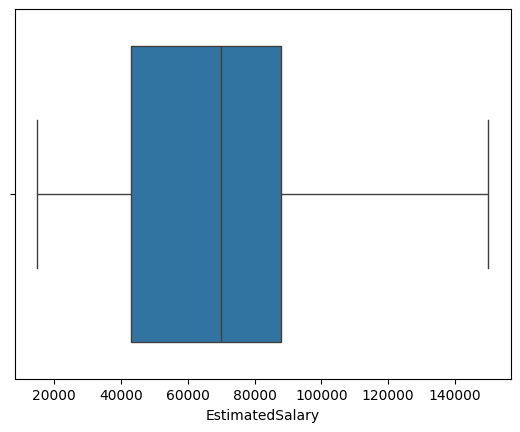

In [9]:
sns.boxplot(data=df,x='EstimatedSalary')

<Axes: xlabel='Gender', ylabel='Age'>

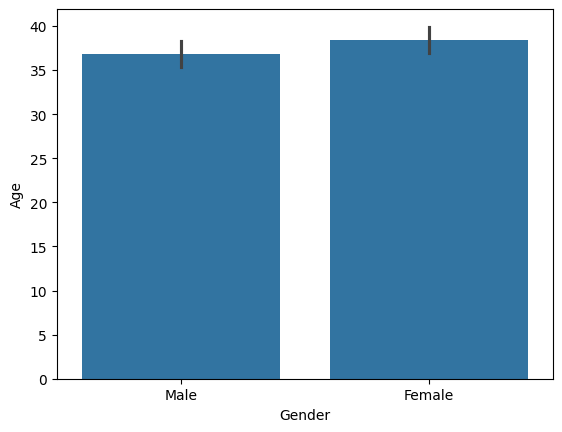

In [10]:
sns.barplot(data=df,x='Gender',y='Age')

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

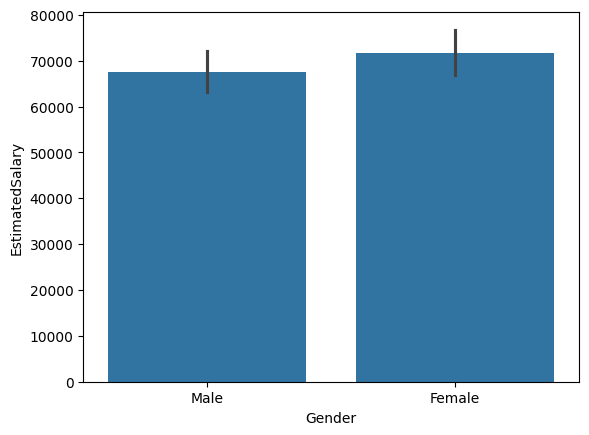

In [11]:
sns.barplot(data=df,x='Gender',y='EstimatedSalary')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

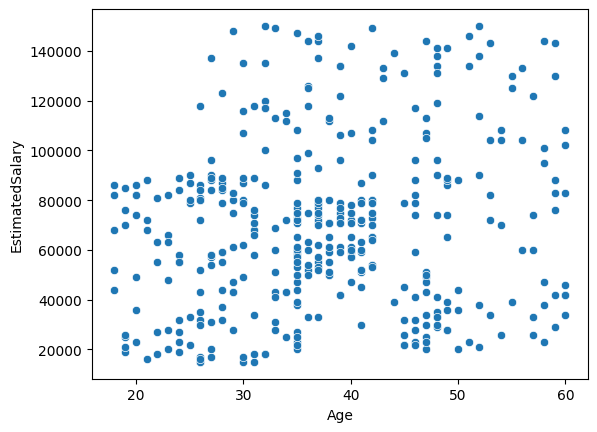

In [12]:
sns.scatterplot(data=df,x='Age',y='EstimatedSalary')

In [13]:
df.drop('User ID' , axis=1,inplace = True)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0) 

In [15]:
X_train

,Gender,Age,EstimatedSalary
92,Male,26,15000
223,Male,60,102000
234,Female,38,112000
232,Male,40,107000
377,Female,42,53000
...,...,...,...
323,Female,48,30000
192,Male,29,43000
117,Male,36,52000
47,Female,27,54000


In [16]:
Y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [17]:
#Onehot encoding for gender column
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(df[['Gender']]))
enc_data

,0
0,"(0, 1)\t1.0"
1,"(0, 1)\t1.0"
2,"(0, 0)\t1.0"
3,"(0, 0)\t1.0"
4,"(0, 1)\t1.0"
...,...
395,"(0, 0)\t1.0"
396,"(0, 1)\t1.0"
397,"(0, 0)\t1.0"
398,"(0, 1)\t1.0"


In [18]:
one_hot_encoded_data = pd.get_dummies(X_train,columns = ['Gender'])
X_train_enc = pd.DataFrame(one_hot_encoded_data)
X_train_enc

,Age,EstimatedSalary,Gender_Female,Gender_Male
92,26,15000,False,True
223,60,102000,False,True
234,38,112000,True,False
232,40,107000,False,True
377,42,53000,True,False
...,...,...,...,...
323,48,30000,True,False
192,29,43000,False,True
117,36,52000,False,True
47,27,54000,True,False


In [20]:
one_hot_encoded_data_Y = pd.get_dummies(X_test,columns = ['Gender'])
X_test_enc = pd.DataFrame(one_hot_encoded_data_Y)
X_test_enc

,Age,EstimatedSalary,Gender_Female,Gender_Male
132,30,87000,False,True
309,38,50000,True,False
341,35,75000,False,True
196,30,79000,True,False
246,35,50000,True,False
...,...,...,...,...
216,49,65000,False,True
259,45,131000,True,False
49,31,89000,True,False
238,46,82000,True,False


In [21]:
X_train_enc.drop('Gender_Male',axis=1,inplace=True)
X_train_enc.head()

,Age,EstimatedSalary,Gender_Female
92,26,15000,False
223,60,102000,False
234,38,112000,True
232,40,107000,False
377,42,53000,True


In [22]:
X_test_enc.drop('Gender_Male',axis=1,inplace=True)
X_test_enc

,Age,EstimatedSalary,Gender_Female
132,30,87000,False
309,38,50000,True
341,35,75000,False
196,30,79000,True
246,35,50000,True
...,...,...,...
216,49,65000,False
259,45,131000,True
49,31,89000,True
238,46,82000,True


In [24]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_enc)
X_train_scaled = scaler.transform(X_train_enc)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train_enc.columns)
X_train_scaled

,Age,EstimatedSalary,Gender_Female
0,-1.163172,-1.584970,-0.992882
1,2.170181,0.930987,-0.992882
2,0.013305,1.220177,1.007169
3,0.209385,1.075582,-0.992882
4,0.405465,-0.486047,1.007169
...,...,...,...
275,0.993704,-1.151185,1.007169
276,-0.869053,-0.775237,-0.992882
277,-0.182774,-0.514966,-0.992882
278,-1.065133,-0.457127,1.007169


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_enc)
X_train_scaled = scaler.transform(X_train_enc)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train_enc.columns)
X_train_scaled

,Age,EstimatedSalary,Gender_Female
0,0.190476,0.000000,0.0
1,1.000000,0.644444,0.0
2,0.476190,0.718519,1.0
3,0.523810,0.681481,0.0
4,0.571429,0.281481,1.0
...,...,...,...
275,0.714286,0.111111,1.0
276,0.261905,0.207407,0.0
277,0.428571,0.274074,0.0
278,0.214286,0.288889,1.0


In [26]:
X_test_scaled = scaler.transform(X_test_enc)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_train_enc.columns)
X_test_scaled

,Age,EstimatedSalary,Gender_Female
0,0.285714,0.533333,0.0
1,0.476190,0.259259,1.0
2,0.404762,0.444444,0.0
3,0.285714,0.474074,1.0
4,0.404762,0.259259,1.0
...,...,...,...
115,0.738095,0.370370,0.0
116,0.642857,0.859259,1.0
117,0.309524,0.548148,1.0
118,0.666667,0.496296,1.0


In [27]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train_scaled,Y_train)

In [28]:
predicted_values = clf.predict(X_test_scaled)

In [29]:
predicted_values.mean()

0.225

In [30]:
from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [31]:
conf_matrix = confusion_matrix(Y_test,predicted_values)
conf_matrix

array([[76,  3],
       [17, 24]], dtype=int64)

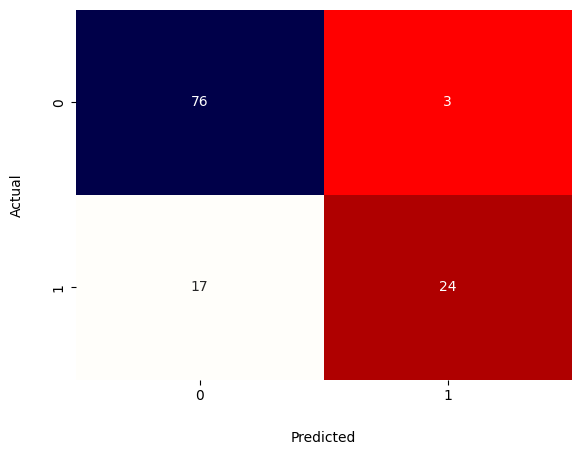

In [32]:
import matplotlib.pyplot as plt

ax = sns.heatmap(
    conf_matrix,
    annot = True,
    fmt = 'd',
    cbar = False,
    cmap = 'flag',
    vmax=175
)
ax.set_xlabel("Predicted",labelpad=20)
ax.set_ylabel("Actual",labelpad=20)
plt.show()

In [33]:
accuracy = accuracy_score(Y_test,predicted_values)
print(f"Accuracy = {accuracy}")

Accuracy = 0.8333333333333334


In [34]:
precision = precision_score(Y_test,predicted_values)
recall = recall_score(Y_test,predicted_values)
f1score = f1_score(Y_test,predicted_values)

print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Precision = 0.8888888888888888
Recall = 0.5853658536585366
F1 Score = 0.7058823529411765
